<a href="https://colab.research.google.com/github/Jakondo/NN-and-Comp-Vision/blob/master/2.7_Seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

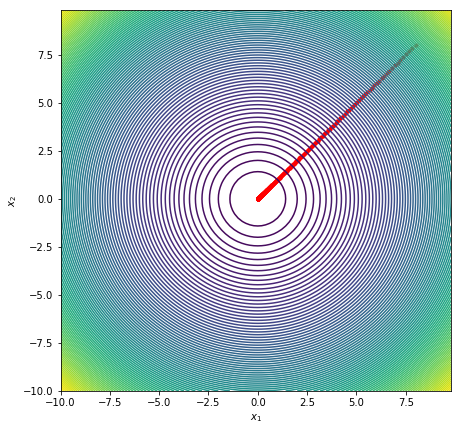

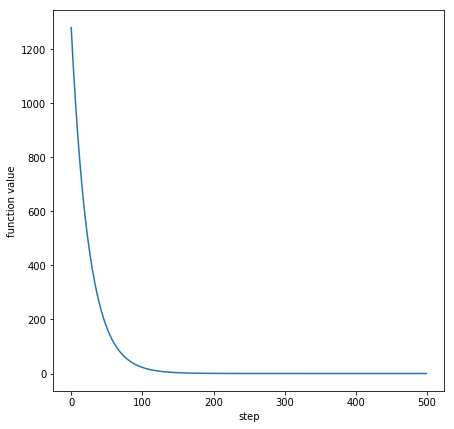

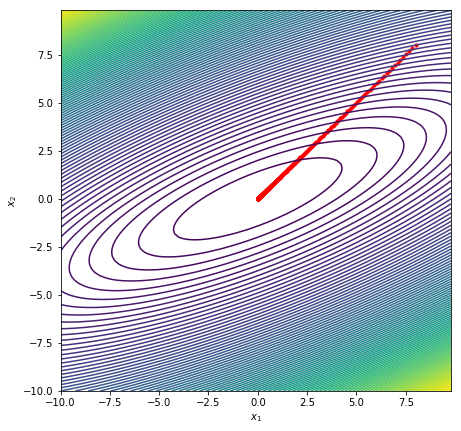

In [118]:
import torch
import numpy as np
import matplotlib.pyplot as plt

'''
Вводные пробные решения в начале семинара

x = torch.tensor([[1., 2., 3., 4.], [5., 6., 7., 8.], [9., 10., 11., 12.]], requires_grad = True)
#requires_grad означает, что мы в дальнейшем хотим считать производные

# #####
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# x = x.to(device)
# cuda_tensor.requires_grad_()
# #####

function = 10*(x**2).sum()
function.backward()

print(x.grad, '<-- gradient')

x.data -= 0.001 *x.grad #обновление тензора, взятие тензора с параметром False

x.grad.zero_() # обнуление градиента

x
'''

def show_contours(obj, x_lims=[-10.0, 10.0], y_lims=[-10.0, 10.0], x_ticks=100, y_ticks=100):
  x_step = (x_lims[1] - x_lims[0])/x_ticks
  y_step = (y_lims[1] - y_lims[0])/y_ticks
  X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
  res = []
  for x_index in range(X.shape[0]):
    res.append([])
    for y_index in range(X.shape[1]):
      x_val = X[x_index, y_index]
      y_val = Y[x_index, y_index]
      res[-1].append(obj(np.array([[x_val, y_val]]).T))
  res = np.array(res)
  plt.figure(figsize=(7,7))
  plt.contour(X,Y,res,100)
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  
  
  
  
  
x = torch.tensor([8., 8.], requires_grad = True)
var_history = []
fn_history = []

optimizer = torch.optim.SGD([x], lr=0.001)

def function_parabola(var):
  return 10*(var**2).sum()


def make_gradient_step(func, var):
  func_result = func(var)
  func_result.backward()
  optimizer.step()
  optimizer.zero_grad()
  
for i in range(500):
  var_history.append(x.data.numpy().copy())
  fn_history.append(function_parabola(x).data.cpu().numpy().copy())
  make_gradient_step(function_parabola, x)

show_contours(function_parabola)
plt.scatter(np.array(var_history)[:, 0], np.array(var_history)[:, 1], s=10, c='r');

plt.figure(figsize=(7,7))
plt.plot(fn_history)
plt.xlabel('step')
plt.ylabel('function value');


def function_skewed(var):
  gramma = torch.tensor([[1., -1.], [1., 1.]]) @ torch.tensor([[1.0, 0.0], [0.0, 4.0]])
  res = 10 * (var.unsqueeze(0) @ (gramma @ var.unsqueeze(1)).sum())
  return res


def function_skewed_up(var):
  gramma = np.array([[1, -1], [1, 1]]) @ np.array([[1.0, 0.0], [0.0, 4.0]])
  res = 10 * (var.transpose(1, 0) @ (gramma @ var)).sum()
  return res


# for i in range(500):
#     var_history.append(x.data.cpu().numpy().copy())
#     fn_history.append(function_skewed(x).data.cpu().numpy().copy())
#     make_gradient_step(function_skewed, x)

show_contours(function_skewed_up)
plt.scatter(np.array(var_history)[:, 0], np.array(var_history)[:, 1], s=10, c='r');
